# 04 - Introduction to OpenCV

[OpenCV](https://opencv.org/) (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in commercial products.

**Key features:**
- Supports multiple programming languages (C++, Python, Java)
- Cross-platform compatibility (Windows, Linux, Mac OS, iOS, Android)
- Handles images as NumPy arrays, making it easy to integrate with scientific computing libraries
- Widely used in industry for real-time computer vision applications

We use OpenCV for basic image operations such as reading and displaying images, color conversions, geometric transformations, and thresholding techniques.

## Table of Contents

1. Installation and Setup
2. Reading, Writing, and Displaying Images
3. Basic Image Manipulation
4. Image Thresholding
5. Exercise: Bill Image Processing
6. Optional: Histogram Equalization and CLAHE

## Installation and Setup

First, let's install and import the necessary libraries.

In [1]:
# Run this cell if OpenCV is not installed in your environment
# This is particularly useful when running on Google Colab or fresh Python installations
!pip install opencv-python

# Optional: install ipywidgets if interactive widgets do not work
# !pip install ipywidgets

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for inline display
%matplotlib inline

## Reading, Writing, and Displaying Images

### Reading Images

OpenCV loads images using `cv2.imread()`, which returns the image as a NumPy array. If the image cannot be read (missing file, improper permissions, or unsupported format), this function returns an empty matrix.

**Syntax:** `cv2.imread(path, flag)`

**Common flags:**
- `cv2.IMREAD_COLOR` or `1`: Loads a color image, ignoring any transparency (default)
- `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode
- `cv2.IMREAD_UNCHANGED` or `-1`: Loads image as-is, including alpha channel

### BGR vs RGB

> **Important:** OpenCV uses BGR (Blue, Green, Red) color order by default, not RGB (Red, Green, Blue).

When displaying OpenCV images with matplotlib (which expects RGB), you need to convert the color order:

```python
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
```

In [3]:
# Load an image from the local images folder
image_bgr = cv2.imread("../images/opencv_sample.png", cv2.IMREAD_COLOR)

# Read the same image in grayscale mode
image_gray = cv2.imread("../images/opencv_sample.png", cv2.IMREAD_GRAYSCALE)

# Convert BGR to RGB for proper display in matplotlib
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

print(f"Color image shape: {image_rgb.shape} (Height, Width, Channels)")
print(f"Grayscale image shape: {image_gray.shape} (Height, Width)")

Color image shape: (512, 512, 3) (Height, Width, Channels)
Grayscale image shape: (512, 512) (Height, Width)


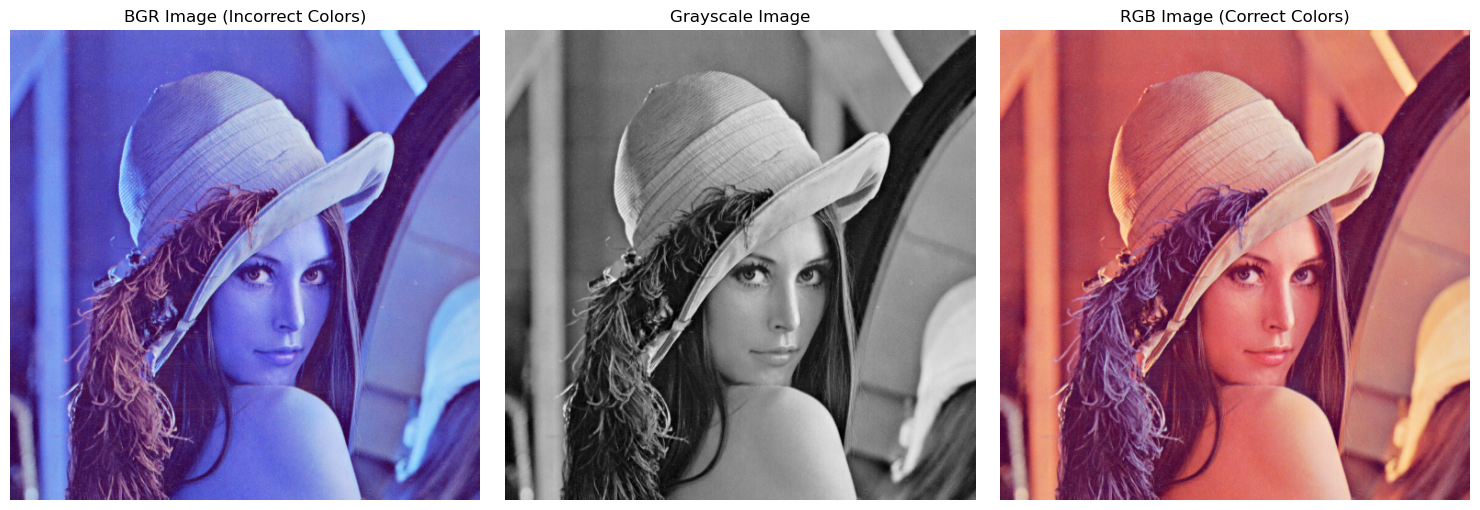

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display BGR image (incorrect colors)
axes[0].imshow(image_bgr)
axes[0].set_title("BGR Image (Incorrect Colors)")
axes[0].axis('off')

# Display grayscale image
axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

# Display RGB image (correct colors)
axes[2].imshow(image_rgb)
axes[2].set_title("RGB Image (Correct Colors)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

**What we observe:**
- The **BGR image** displays incorrect colors (blue and red are swapped)
- The **grayscale image** has only one channel, showing luminance information
- The **RGB image** displays correct colors after conversion

### Writing Images

Save images using `cv2.imwrite()`. The image format is determined by the filename extension.

**Syntax:** `cv2.imwrite(filename, img)`

**Returns:** `True` if the image was saved successfully, `False` otherwise.

In [5]:
# Example: Save the grayscale image
# success = cv2.imwrite("output_gray.jpg", image_gray)
# print(f"Image saved: {success}")

## Basic Image Manipulation

### Resizing Images

Resizing changes the dimensions of an image. Use `cv2.resize()` to specify new dimensions or scale factors.

**Syntax:** `cv2.resize(src, dsize, fx, fy, interpolation)`

**Parameters:**
- `src`: Input image
- `dsize`: Desired output size as `(width, height)`
- `fx`, `fy`: Scale factors (used when `dsize` is `(0, 0)`)
- `interpolation`: Resampling method

**Common interpolation methods:**
- `cv2.INTER_LINEAR`: Good default for most cases
- `cv2.INTER_NEAREST`: Fastest but may produce jagged edges
- `cv2.INTER_AREA`: Recommended for downsizing
- `cv2.INTER_CUBIC`: Slower but better for upsizing
- `cv2.INTER_LANCZOS4`: Highest quality

**Practical uses:**
- Preparing images for neural networks (fixed input size)
- Creating thumbnails
- Reducing computational requirements

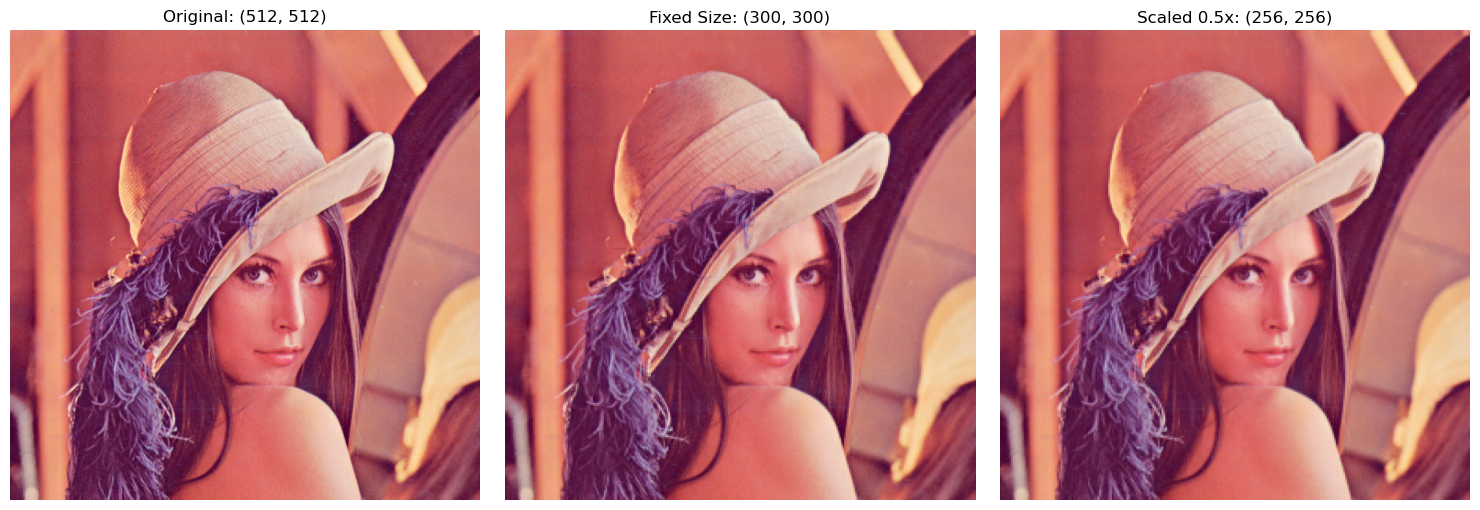

In [6]:
# Resize to specific dimensions
resized_fixed = cv2.resize(image_rgb, (300, 300), interpolation=cv2.INTER_LINEAR)

# Resize using scale factors
resized_scaled = cv2.resize(image_rgb, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title(f"Original: {image_rgb.shape[:2]}")
axes[0].axis('off')

axes[1].imshow(resized_fixed)
axes[1].set_title(f"Fixed Size: {resized_fixed.shape[:2]}")
axes[1].axis('off')

axes[2].imshow(resized_scaled)
axes[2].set_title(f"Scaled 0.5x: {resized_scaled.shape[:2]}")
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Rotating Images

Rotation is performed using a transformation matrix. Use `cv2.getRotationMatrix2D()` to create the matrix and `cv2.warpAffine()` to apply it.

**cv2.getRotationMatrix2D(center, angle, scale):**
- `center`: Center of rotation (x, y)
- `angle`: Rotation angle in degrees (positive = counter-clockwise)
- `scale`: Isotropic scale factor (1.0 = no scaling)

**cv2.warpAffine(src, M, dsize):**
- `src`: Input image
- `M`: 2×3 transformation matrix
- `dsize`: Output image size as `(width, height)`

**Practical uses:**
- Correcting tilted images
- Data augmentation for machine learning

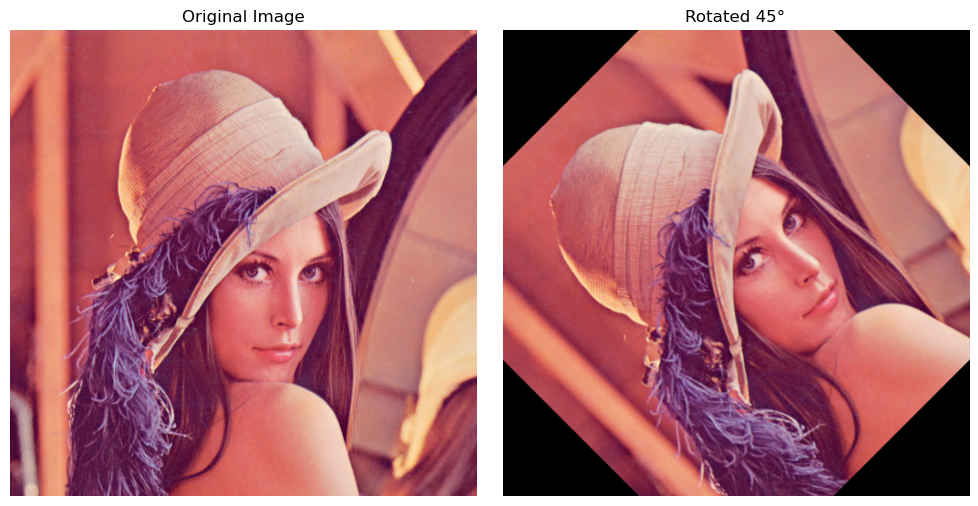

In [7]:
# Get image center
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)

# Create rotation matrix (45 degrees counter-clockwise)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

# Apply rotation
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image_rgb.shape[1], image_rgb.shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(rotated_image)
axes[1].set_title("Rotated 45°")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Cropping Images

Cropping extracts a rectangular region from an image using NumPy array slicing.

**Syntax:** `cropped = image[y1:y2, x1:x2]`

Note that the first index is the row (y-coordinate) and the second is the column (x-coordinate).

**Practical uses:**
- Extracting regions of interest
- Removing unwanted borders
- Focusing on specific image areas

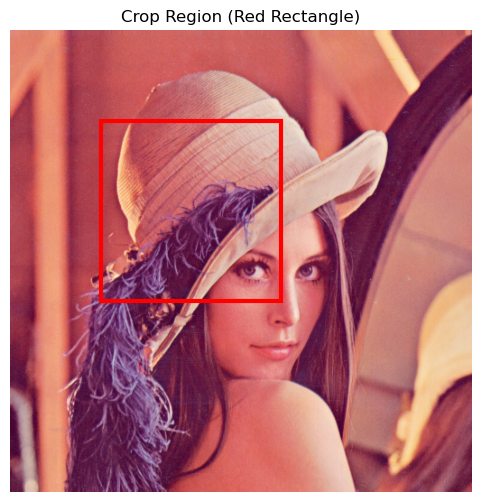

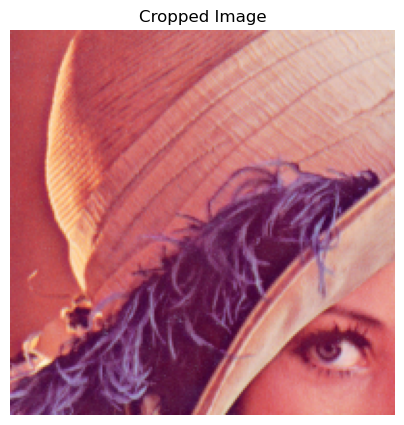

Original size: (512, 512)
Cropped size: (200, 200)


In [8]:
import matplotlib.patches as patches

# Define crop region: (x, y, width, height)
crop_x, crop_y, crop_w, crop_h = 100, 100, 200, 200

# Visualize the crop region
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_rgb)

# Draw rectangle showing crop region
rect = patches.Rectangle(
    (crop_x, crop_y), crop_w, crop_h,
    linewidth=3, edgecolor='red', facecolor='none'
)
ax.add_patch(rect)
ax.set_title('Crop Region (Red Rectangle)')
ax.axis('off')
plt.show()

# Perform the crop (note: array indexing is [y:y+h, x:x+w])
cropped_image = image_rgb[crop_y:crop_y + crop_h, crop_x:crop_x + crop_w]

# Display cropped result
plt.figure(figsize=(5, 5))
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()

print(f"Original size: {image_rgb.shape[:2]}")
print(f"Cropped size: {cropped_image.shape[:2]}")

## Image Thresholding

Image thresholding is a technique for partitioning an image into foreground and background by classifying pixels based on their intensity values.

### Basic (Global) Thresholding

Basic thresholding applies a fixed threshold to all pixels:

$$
g(x, y) = 
\begin{cases}
\text{maxVal} & \text{if } f(x, y) > \text{threshold} \\
0 & \text{otherwise}
\end{cases}
$$

**Syntax:** `retval, dst = cv2.threshold(src, thresh, maxval, type)`

**Parameters:**
- `src`: Grayscale input image
- `thresh`: Threshold value
- `maxval`: Maximum value for binary thresholding
- `type`: Thresholding type (e.g., `cv2.THRESH_BINARY`)

**Practical uses:**
- Separating objects from background
- Document image processing
- Preparing images for further analysis

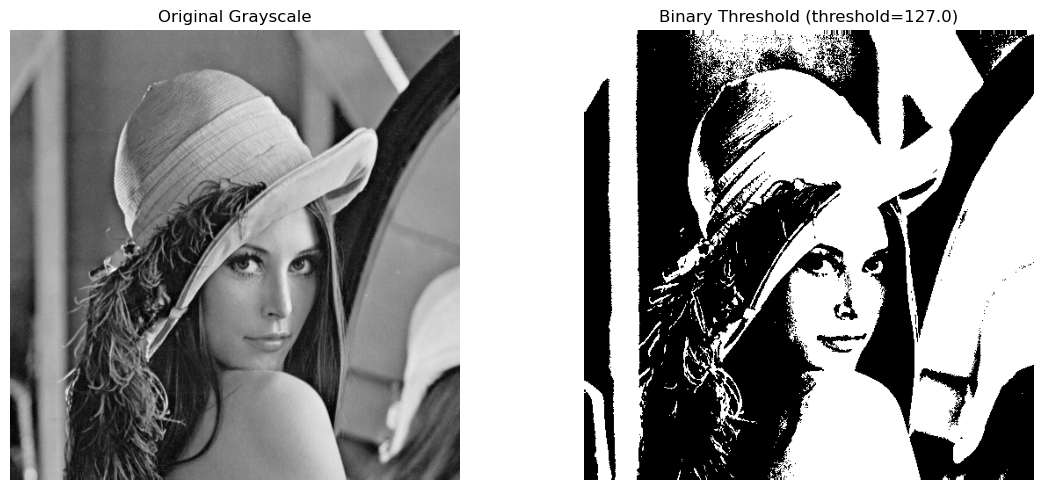

In [9]:
# Convert to grayscale for thresholding
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Apply basic thresholding
ret, thresh_basic = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

axes[1].imshow(thresh_basic, cmap='gray')
axes[1].set_title(f'Binary Threshold (threshold={ret})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Adaptive Thresholding

Adaptive thresholding computes the threshold locally for different regions of the image. This is useful when lighting conditions vary across the image.

**Syntax:** `dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`

**Parameters:**
- `maxValue`: Value assigned to pixels exceeding the threshold
- `adaptiveMethod`: Method for calculating the threshold
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: Threshold = mean of neighborhood - C
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Threshold = weighted sum of neighborhood - C
- `thresholdType`: `cv2.THRESH_BINARY` or `cv2.THRESH_BINARY_INV`
- `blockSize`: Size of pixel neighborhood (must be odd, e.g., 11, 15, 21)
- `C`: Constant subtracted from the calculated mean

**Key differences:**
- **MEAN_C**: Simple average of neighborhood pixels
- **GAUSSIAN_C**: Weighted average (center pixels weighted more), better for varying illumination

**Practical uses:**
- Document scanning with uneven lighting
- Processing images with shadows
- Text extraction from images

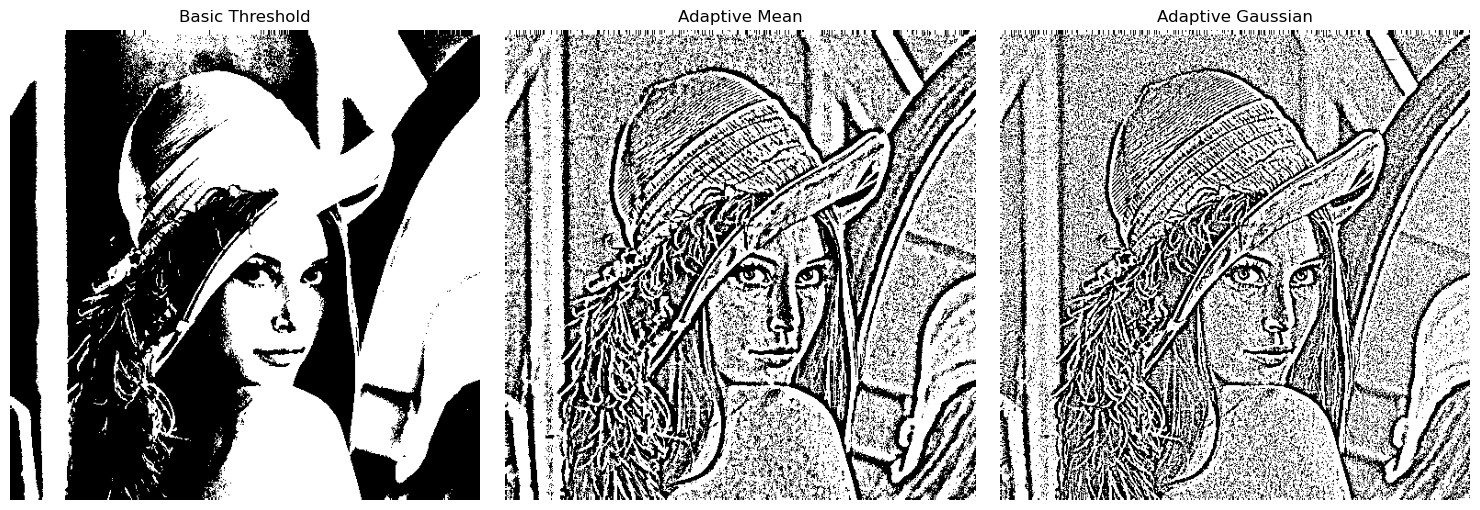

In [10]:
# Apply adaptive thresholding with MEAN method
adaptive_mean = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Apply adaptive thresholding with GAUSSIAN method
adaptive_gaussian = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(thresh_basic, cmap='gray')
axes[0].set_title('Basic Threshold')
axes[0].axis('off')

axes[1].imshow(adaptive_mean, cmap='gray')
axes[1].set_title('Adaptive Mean')
axes[1].axis('off')

axes[2].imshow(adaptive_gaussian, cmap='gray')
axes[2].set_title('Adaptive Gaussian')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Optional: Interactive Thresholding

This interactive widget allows you to experiment with different thresholding parameters.

**Note:** Requires `ipywidgets` to be installed and a Jupyter environment that supports widgets.

In [11]:
from ipywidgets import interact, widgets

def interactive_thresholding(thresh_type, threshold, block_size, C):
    """Interactive thresholding demonstration."""
    if thresh_type == 'Binary':
        _, th = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    elif thresh_type == 'Adaptive Mean':
        th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    elif thresh_type == 'Adaptive Gaussian':
        th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)
    
    plt.imshow(th, cmap='gray')
    plt.axis('off')
    plt.show()

interact(
    interactive_thresholding,
    thresh_type=widgets.Dropdown(
        options=['Binary', 'Adaptive Mean', 'Adaptive Gaussian'],
        value='Binary',
        description='Method:'
    ),
    threshold=widgets.IntSlider(min=0, max=255, step=1, value=127, description='Threshold:'),
    block_size=widgets.IntSlider(min=3, max=21, step=2, value=11, description='Block Size:'),
    C=widgets.IntSlider(min=0, max=10, value=2, description='C Value:')
);

interactive(children=(Dropdown(description='Method:', options=('Binary', 'Adaptive Mean', 'Adaptive Gaussian')…

## Exercise: Bill Image Processing

**Task:** Read the bill image in grayscale, rotate it to a vertical orientation, and apply thresholding to improve image quality.

**Steps:**
1. Load the bill image in grayscale mode
2. Rotate it to vertical orientation (experiment with angles like 90, -90, or adjust as needed)
3. Apply either basic or adaptive thresholding to enhance text visibility

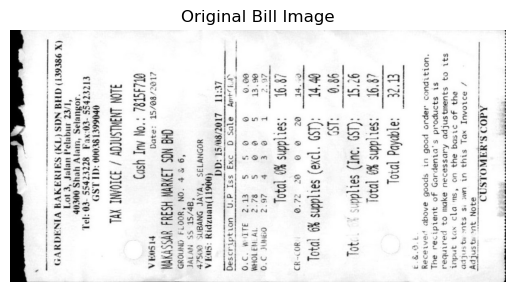

In [12]:
# Step 1: Read the image in grayscale mode
bill_gray = cv2.imread("../images/bill_1.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(bill_gray, cmap='gray')
plt.axis('off')
plt.title('Original Bill Image')
plt.show()

In [13]:
# Step 2: Rotate the image to vertical orientation
# Hint: Create a rotation matrix with cv2.getRotationMatrix2D
# Then apply it with cv2.warpAffine
# Example angle: 90 or -90 degrees to make it vertical

# TODO: Fill in the rotation angle (e.g., 90, -90, or adjust as needed)
# rotation_matrix = cv2.getRotationMatrix2D(
#     (bill_gray.shape[1]/2, bill_gray.shape[0]/2), ANGLE_HERE, 1
# )

# TODO: Fill in the image and rotation matrix
# rotated_bill = cv2.warpAffine(IMAGE_HERE, MATRIX_HERE, (bill_gray.shape[1], bill_gray.shape[0]))

# Uncomment the lines below after completing the rotation
# plt.imshow(rotated_bill, cmap='gray')
# plt.axis('off')
# plt.title('Rotated Bill Image')
# plt.show()

In [14]:
# Step 3: Apply thresholding to improve image quality
# Try both basic thresholding and adaptive thresholding
# Compare the results to see which works better

# Option 1: Basic thresholding
# TODO: Fill in the threshold value (try values like 127, 150, etc.)
# ret, bill_thresh = cv2.threshold(rotated_bill, THRESHOLD_VALUE, 255, cv2.THRESH_BINARY)

# Option 2: Adaptive thresholding (often better for documents)
# TODO: Fill in the parameters (blockSize must be odd, e.g., 11, 15, 21)
# bill_thresh = cv2.adaptiveThreshold(rotated_bill, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, BLOCKSIZE, C_VALUE)

# Uncomment the lines below after completing the thresholding
# plt.imshow(bill_thresh, cmap='gray')
# plt.axis('off')
# plt.title('Thresholded Bill Image')
# plt.show()

## Optional: Histogram Equalization and CLAHE

This section covers advanced techniques for improving image contrast. These methods are particularly useful for images with poor lighting conditions.

### What is Histogram Equalization?

Histogram equalization improves image contrast by spreading out the intensity distribution. It makes dark pixels darker and bright pixels brighter, increasing the global contrast.

**When to use it:**
- Medical imaging (X-rays, CT scans)
- Low-contrast photographs
- Images with uniform lighting

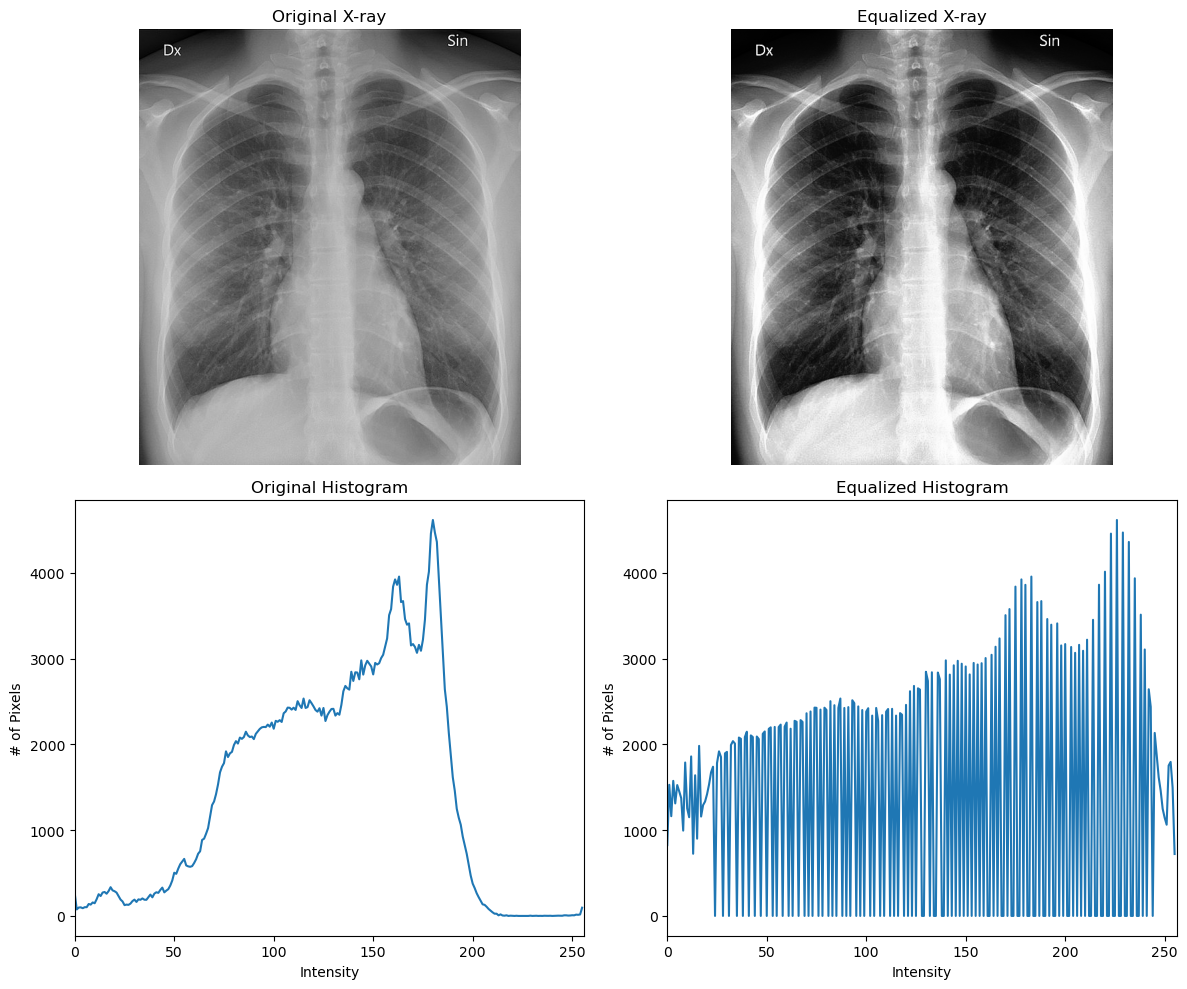

In [15]:
# Load a low-contrast image (X-ray)
xray_image = cv2.imread("../images/xray_sample.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized = cv2.equalizeHist(xray_image)

# Calculate histograms
hist_original = cv2.calcHist([xray_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])

# Display results
fig = plt.figure(figsize=(12, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title("Original Histogram")
plt.xlabel("Intensity")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized X-ray")
plt.axis('off')

# Equalized histogram
plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title("Equalized Histogram")
plt.xlabel("Intensity")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

CLAHE improves upon standard histogram equalization by:
- Applying equalization locally to small regions (tiles)
- Limiting contrast amplification to prevent noise enhancement

**Key parameters:**
- `clipLimit`: Contrast limiting threshold (higher = more contrast)
- `tileGridSize`: Size of local regions (e.g., 8×8)

**When to use CLAHE:**
- Images with varying lighting conditions
- When standard histogram equalization over-amplifies noise
- Medical and scientific imaging

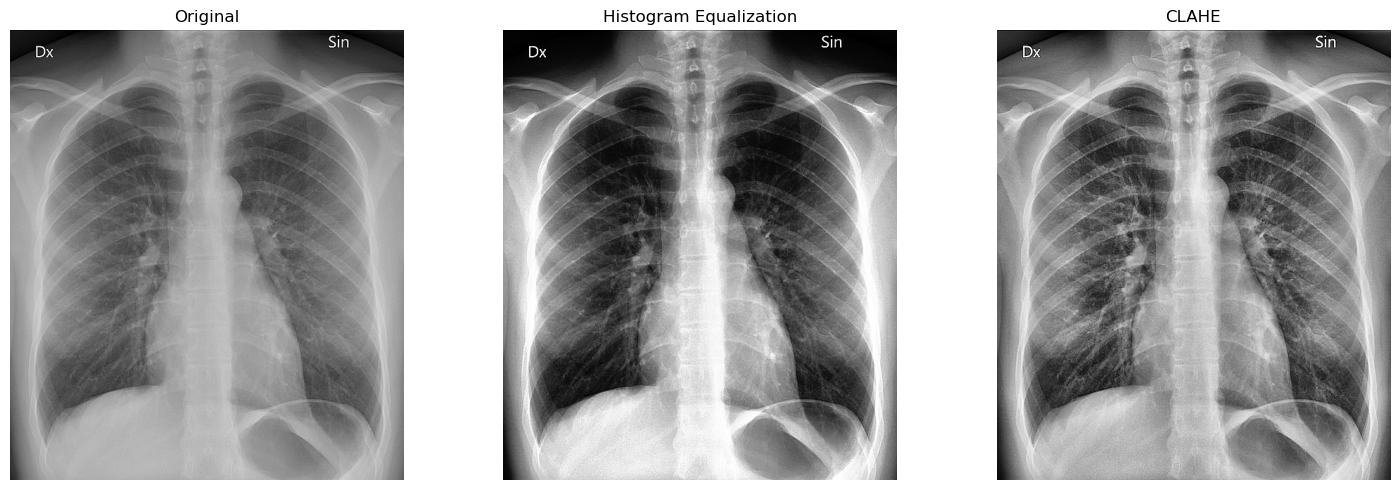

In [16]:
# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
clahe_image = clahe.apply(xray_image)

# Display comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(xray_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(equalized, cmap='gray')
axes[1].set_title('Histogram Equalization')
axes[1].axis('off')

axes[2].imshow(clahe_image, cmap='gray')
axes[2].set_title('CLAHE')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Optional: Interactive CLAHE

Experiment with CLAHE parameters interactively.

**Note:** Requires `ipywidgets` to be installed and a Jupyter environment that supports widgets.

In [17]:
def interactive_clahe(clip_limit, tile_grid_size):
    """Interactive CLAHE demonstration."""
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_grid_size, tile_grid_size))
    clahe_image = clahe.apply(xray_image)
    
    plt.imshow(clahe_image, cmap='gray')
    plt.axis('off')
    plt.title(f'CLAHE (clipLimit={clip_limit}, tileSize={tile_grid_size})')
    plt.show()

interact(
    interactive_clahe,
    clip_limit=widgets.FloatSlider(min=1, max=5, step=0.1, value=2, description='Clip Limit:'),
    tile_grid_size=widgets.IntSlider(min=1, max=16, step=1, value=8, description='Tile Size:')
);

interactive(children=(FloatSlider(value=2.0, description='Clip Limit:', max=5.0, min=1.0), IntSlider(value=8, …

## Recap

This notebook covered fundamental OpenCV operations:

**Reading and Displaying Images:**
- OpenCV uses BGR color order (convert to RGB for matplotlib)
- Images are represented as NumPy arrays
- Reading with different flags: color, grayscale, unchanged

**Basic Transformations:**
- Resizing with different interpolation methods
- Rotating using transformation matrices
- Cropping using NumPy array slicing

**Thresholding:**
- Basic (global) thresholding for uniform images
- Adaptive thresholding for varying lighting conditions

**Optional Advanced Techniques:**
- Histogram equalization for global contrast enhancement
- CLAHE for local contrast enhancement with noise control

These operations form the foundation for more advanced computer vision tasks, including object detection, tracking, and deep learning-based applications.